# Project: Kernelization, Kernel Tricks

**Put any package imports you need in the below space**

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.kernel_approximation import RBFSampler

**Exercise 1: Generating the data sets.**

Write a script that generates three data sets in a 2-dimensional space, defined as follows:
1. BAD_kmeans: a data set for which the k-means clustering algorithm will not perform well.
2. BAD_pca: a data set for which the Principal Component Analysis (PCA) dimension reduction method upon projection of the original points onto 1-dimensional space (i.e., the first eigenvector) will not perform well.
3. BAD_svm: a data set for which the linear Support Vector Machine (SVM) supervised classification method using two classes of points (positive and negative)  will not perform well.
4. Plot each data set in a 2-dimensional space.
    
Note: If appropriate, the same data set may be used for multiple parts.

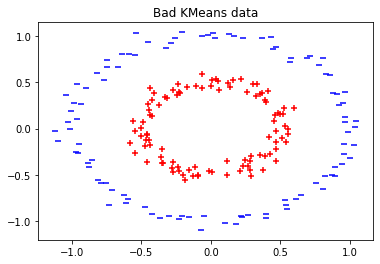

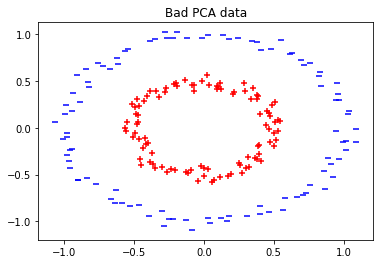

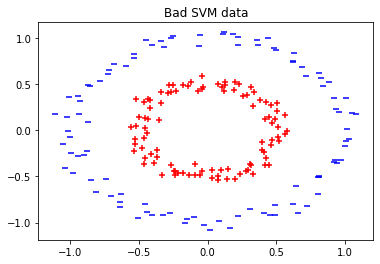

In [44]:
def gen_bad_data(n_samples):
    return make_circles(n_samples=n_samples, factor= 0.5, noise=.05)

def plot_dataset(data, title, labels=None):
    positive = data[labels==1]
    negative = data[labels==0]
    plt.scatter(positive[:,0], positive[:,1], marker="+", color="red")
    plt.scatter(negative[:,0], negative[:,1], marker="_", color="blue")
    plt.title(title)
    plt.show()
    

bad_kmeans_data, bad_kmeans_labels = gen_bad_data(200)
bad_pca_data, bad_pca_labels = gen_bad_data(200)
bad_svm_data, bad_svm_labels = gen_bad_data(200)
plot_dataset(bad_kmeans_data,"Bad KMeans data",bad_kmeans_labels)
plot_dataset(bad_pca_data,"Bad PCA data",bad_pca_labels)
plot_dataset(bad_svm_data,"Bad SVM data", bad_svm_labels)

**Exercise 2: Evaluating the "badness" of the data mining methods.**

Write a script that uses the BAD data sets in Exercise 1, runs the corresponding data mining method, produces the output of the method, and evaluates the performance of the method using (e.g., 10-fold) cross-validation and various performance metrics (e.g., variance, precision, recall, F1 measure). Note that not all metrics can be equally applied to every method. Report the performance metrics used and a summary of the results obtained. Reading the chapter “Performance Metrics for Graph Mining Tasks” by Kanchana Padmanabhan and John Jenkins in the resources for performance metrics is strongly encouraged for performing this exercise. 

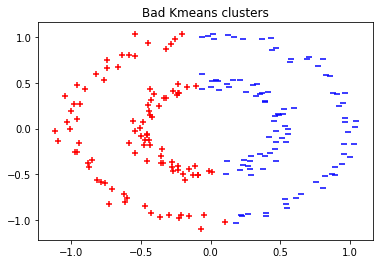

              precision    recall  f1-score   support

           0       0.50      0.51      0.50       100
           1       0.50      0.49      0.49       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200


10-fold cross validation score: -9.299708081689097



In [115]:
# Kmeans
def kmeans(data,labels):
    kmeans = KMeans(n_clusters=2, random_state=100)
    kmeans.fit(data)
    bad_kmeans_clusters = kmeans.predict(data)

    # Plot Kmeans after clustering
    plot_dataset(data,"Bad Kmeans clusters",bad_kmeans_clusters)

    # Performance metrics evaluation
    kmeans_score = cross_val_score(kmeans, data, labels, cv=10).mean()
    kmeans_metrics = classification_report(labels, bad_kmeans_clusters)
    print(kmeans_metrics)
    print(f'\n10-fold cross validation score: {kmeans_score}\n')

kmeans(bad_kmeans_data, bad_kmeans_labels)

In [116]:
# PCA
def pca(bad_pca_data):
    pca = PCA(n_components=1)
    pca.fit(bad_pca_data)

    # Performance metrics evaluation
    pca_score = cross_val_score(pca, bad_pca_data, bad_pca_labels, cv=10).mean()
    print(f'\n10-fold cross validation score: {pca_score}\n')
    print(f'PCA variance: {pca.explained_variance_ratio_[0]}\n')

pca(bad_pca_data)


10-fold cross validation score: -1.6996870684598668

PCA variance: 0.5060830520272891



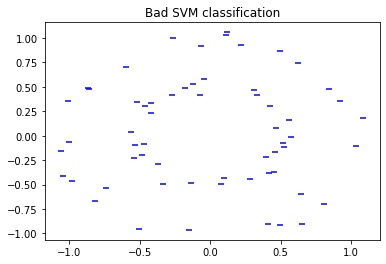

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        28
           1       0.00      0.00      0.00        32

    accuracy                           0.47        60
   macro avg       0.23      0.50      0.32        60
weighted avg       0.22      0.47      0.30        60


Accracy: 0.4666666666666667

Number of support vectors:  [70 68]


c:\users\justin hu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
# SVM
def svm(bad_svm_data):
    X_train, X_test, y_train, y_test = train_test_split(bad_svm_data, bad_svm_labels, test_size=0.3, random_state=123)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    bad_svm_class = svm.predict(X_test)

    # Plot Kmeans after clustering
    plot_dataset(X_test,"Bad SVM classification",bad_svm_class)

    # Performance metrics evaluation
    svm_score = svm.score(X_test, y_test)
    svm_metrics = classification_report(y_test, bad_svm_class)
    print(svm_metrics)
    print(f'\nAccracy: {svm_score}\n')
    print("Number of support vectors: " ,svm.n_support_)

svm(bad_svm_data)

**Exercise 3: Kernelizing the methods.**

Write a script that uses the kernelized version of each of the data mining methods in Exercise 2.
1. Choose at least two kernels for each polynomial kernel and  method.
2. Use the same performance metrics as in Exercise 2 and compare the performance of the original un-kernelized version of the method versus the performance obtained after applying the kernel trick.
3. Do you observe a difference in performance when you use different kernels?
4. What are the best performance results you obtain by trying different kernels and kernel parameters? Also, make sure to report the number of support vectors for the SVM (a good rule of thumb is to strive for no more than 35%-50% support vectors to avoid model overfitting).

Ans: The following implementations with kernel and radial basis function kernel, including the performance metrics. The detailed comparison and analysis will be answered after the code blocks.

Polynomial kernel on Kmeans



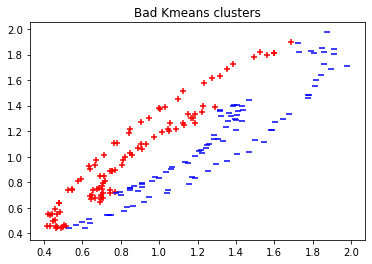

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       100
           1       0.50      0.51      0.50       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200


10-fold cross validation score: -1589.0677634955148

--------------------------------------------------------------------------------------------
Polynomial kernel on PCA


10-fold cross validation score: -174.34752171912868

PCA variance: 0.48167774481566805

--------------------------------------------------------------------------------------------
Polynomial kernel on SVM



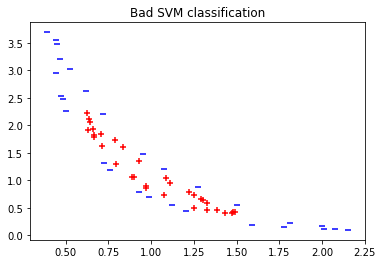

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        32

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accracy: 1.0

Number of support vectors:  [4 2]


In [118]:
# Method 1: polynomial kernel
def poly_kernel(data):
    return pairwise_kernels(data, metric="poly")

# Kmeans
print("Polynomial kernel on Kmeans\n")
kmeans(poly_kernel(bad_kmeans_data), bad_kmeans_labels)
print("--------------------------------------------------------------------------------------------")

# PCA
print("Polynomial kernel on PCA\n")
pca(poly_kernel(bad_pca_data))
print("--------------------------------------------------------------------------------------------")

# SVM
print("Polynomial kernel on SVM\n")
svm(poly_kernel(bad_svm_data))
    

Radial basis function kernel on Kmeans



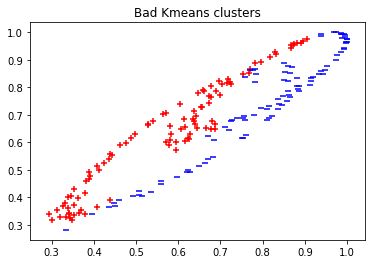

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       100
           1       0.50      0.51      0.50       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200


10-fold cross validation score: -156.75232667697318

--------------------------------------------------------------------------------------------
Radial basis function kernel on PCA


10-fold cross validation score: 41.93407219228246

PCA variance: 0.4209034822865466

--------------------------------------------------------------------------------------------
Radial basis function kernel on SVM



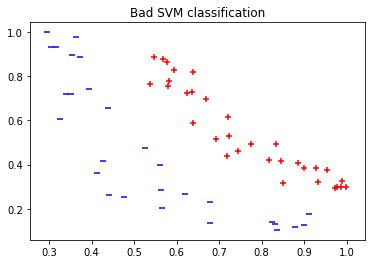

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        32

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accracy: 1.0

Number of support vectors:  [3 2]


In [120]:
# Method 2: radial basis function kernel(rbf)
def rbf_kernel(data):
    return pairwise_kernels(data, metric="rbf")

# Kmeans
print("Radial basis function kernel on Kmeans\n")
kmeans(rbf_kernel(bad_kmeans_data), bad_kmeans_labels)
print("--------------------------------------------------------------------------------------------")

# PCA
print("Radial basis function kernel on PCA\n")
pca(rbf_kernel(bad_pca_data))
print("--------------------------------------------------------------------------------------------")

# SVM
print("Radial basis function kernel on SVM\n")
svm(rbf_kernel(bad_svm_data))

**Results analysis and comparison**

SVM is strongly improved on accurancy and the performance metrics on both two kernel methods. However, the PCA variance decrease on both kernel method, and rbf even worse, it only 42% comparing to unkernelized 50%. Kmeans has not much difference on all three conditions, no matter with or without kernelizing, Kmeans remains only 50% precision. But if we only consider the overall imporvement, rbf kernel is better than polynomial kernel on Kmeans.  

**Exercise 4: Pipelining.**

Dimension reduction is often used as a key data pre-processing step for other data mining methods downstream the end-to-end data analysis. In this exercise, you will use unsupervised kernel PCA as a pre-processing step for clustering. Later in the course, we will use supervised dimension reduction methods as a pre-processing step for supervised classification methods.
1. Generalize your BAD_kmeans data set to very high-dimensional space (d>>2).
2. Show that the k-means clustering algorithm does not perform well on that data.

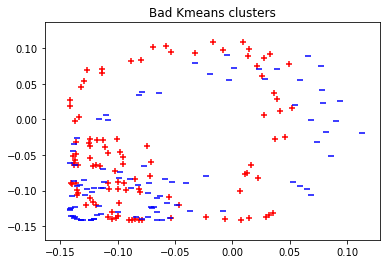

              precision    recall  f1-score   support

           0       0.49      0.48      0.49       100
           1       0.50      0.51      0.50       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200


10-fold cross validation score: -8.084888510133739



In [145]:
def high_dimension(data):
    rbfsampler = RBFSampler(n_components=100)
    high_data = rbfsampler.fit_transform(data)
    return high_data

high_kmeans_data = high_dimension(bad_kmeans_data)
kmeans(high_kmeans_data, bad_kmeans_labels)

3. Apply the kernel PCA method to this high dimensional data set and identify the number (m<<d) of principal components (i.e., eigenvectors) that provide a reasonably good low-dimensional approximation of your data (i.e., based on eigenvalue distribution). How much total variability of the data will be preserved upon using this low-dimensional representation?
4. Project your original data onto the top m eigenvectors corresponding to the largest eigenvalues.

The data representation of m = 8: 0.9983116884817693


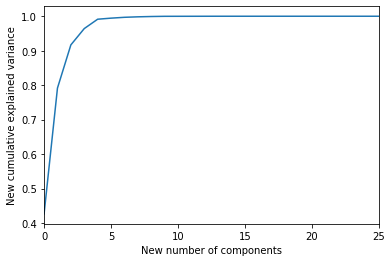

In [154]:
#Apply the rbf kernel PCA
new_pca = PCA().fit(rbf_kernel(high_dimension(bad_kmeans_data)))

m8_sum = sum(new_pca.explained_variance_ratio_[:8])

print(f'The data representation of m = 8: {m8_sum}')

# Project the largest eigenvalues
plt.plot(np.cumsum(new_pca.explained_variance_ratio_))
plt.xlabel('New number of components')
plt.xlim(0,25)
plt.ylabel('New cumulative explained variance')
plt.show()

With the results above, we can know when m = 8, then we can have 99.7% data representation.

5. Run the k-means clustering algorithm on the projected low dimensional data.

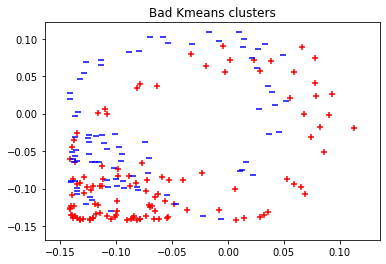

              precision    recall  f1-score   support

           0       0.54      0.46      0.50       100
           1       0.53      0.61      0.57       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200


10-fold cross validation score: -0.6396995033085379



In [147]:
# Run the k-means clustering algorithm on the projected low dimensional data (In my case, m=8).
m = 8
high_kmeans_data_m = [ h[0:m] for h in high_kmeans_data ]
kmeans(np.asarray(high_kmeans_data_m), bad_kmeans_labels)

6. Compare the performance of the k-means clustering algorithm on the d-dimensional original data vs. the m-dimensional projected data. Has the performance improved?

Ans: There is a very slight increase of performance of Kmeans clustering on m-dimensional projected data as compared to the d-dimensional Kmeans data.

7. If you run the kernel k-means clustering algorithm on the original data, will you get better or worse performance? Discuss the pros and cons of using kernel k-means on the original data directly versus applying kernel PCA as a pre-processing step and then running the k-means clustering algorithm on the low-dimensional data.

Ans: Kernelized Kmeans on the original high dimensional data will have worse performance comparing to PCA kmeans since it redeuces the complexity. It becomes computationally intensive to run the k-means over all the dimensions. If we directly use the original data, this might contain a lot of noise because of the lower valued eigenvectors and the performance would be poor.

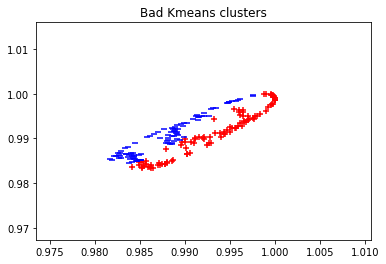

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       100
           1       0.52      0.51      0.51       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200


10-fold cross validation score: -0.07816789519031601



In [149]:
# Apply kernelized kmeans with rbf kernel
kmeans(rbf_kernel(high_kmeans_data), bad_kmeans_labels)